In [33]:
import numpy
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

import nbimporter
import EpsilonGreedy
import SoftMax
import UpperConfidenceBound
import ThompsonSampling

from MonteCarloSimulationsForBandits import *

In [34]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = [ BernoulliArm(mu) for mu in  means ]
print(f"Best arms is {means.index( max(means) )} with success rate of { max(means) }")
fileSuffix = "_".join([str(val_).replace(".","") for val_ in means])
best_arm_idx = means.index( max(means) )

Best arms is 2 with success rate of 0.9


In [35]:
noOfRounds = 5000
noOfTurns  = 250

In [4]:

fPointer = open(f'Epsilon_greedy_with_multiple_epsilons_{fileSuffix}.csv', 'w')
for epsilon in [ 0.1, 0.3] :
    algo = EpsilonGreedy.EpsilonGreedy( epsilon)
    algo.initialize(n_arms)
    results = testing_algorithm( algo, arms, noOfRounds, noOfTurns)
    for i in range( len(results[0])):
        fPointer.write( str(epsilon) + ',' )
        fPointer.write( ','.join( [ str( results[j][i] ) for j in range( len(results) )])  + '\n')
fPointer.close()

fPointer = open( f'annealing_epsilon_greedy_results_{fileSuffix}.csv', 'w')
algo = EpsilonGreedy.AnnealingEpsilonGreedy ( )
algo.initialize(n_arms)
results = testing_algorithm( algo, arms, noOfRounds, noOfTurns)
for i in range( len(results[0]) ):
    fPointer.write( ','.join( [ str( results[j][i]) for j in range( len(results) ) ] )  + '\n')
fPointer.close()

fPointer = open( f'standard_softmax_results_{fileSuffix}.csv', 'w')
for temperature in [ 0.1, 0.3] :
    algo = SoftMax.SoftMax ( temperature )
    algo.initialize(n_arms)
    results = testing_algorithm( algo, arms, noOfRounds, noOfTurns)
    for i in range( len(results[0]) ):
        fPointer.write( str(temperature)  + ',')
        fPointer.write( ','.join( [ str( results[j][i]) for j in range( len(results) ) ] )  + '\n')
fPointer.close()

fPointer = open( f'annealing_softmax_results_{fileSuffix}.csv', 'w')
algo = SoftMax.AnnealingSoftMax()
algo.initialize(n_arms)
results = testing_algorithm( algo, arms, noOfRounds, noOfTurns)
for i in range( len(results[0]) ):
    fPointer.write( ','.join( [ str( results[j][i]) for j in range( len(results) ) ] )  + '\n')
fPointer.close()


fPointer = open( f'UpperConfidenceBound_{fileSuffix}.csv', 'w')
algo = UpperConfidenceBound.UCB1()
algo.initialize(n_arms)
results = testing_algorithm( algo, arms, noOfRounds, noOfTurns)
for i in range( len(results[0]) ):
    fPointer.write( ','.join( [ str( results[j][i]) for j in range( len(results) ) ] )  + '\n')
fPointer.close()

fPointer = open( f'ThompsonSampling_{fileSuffix}.csv', 'w')
algo = ThompsonSampling.ThmopsonSampling()
algo.initialize(n_arms)
results = testing_algorithm( algo, arms, noOfRounds, noOfTurns)
for i in range( len(results[0]) ):
    fPointer.write( ','.join( [ str( results[j][i]) for j in range( len(results) ) ] )  + '\n')
fPointer.close()

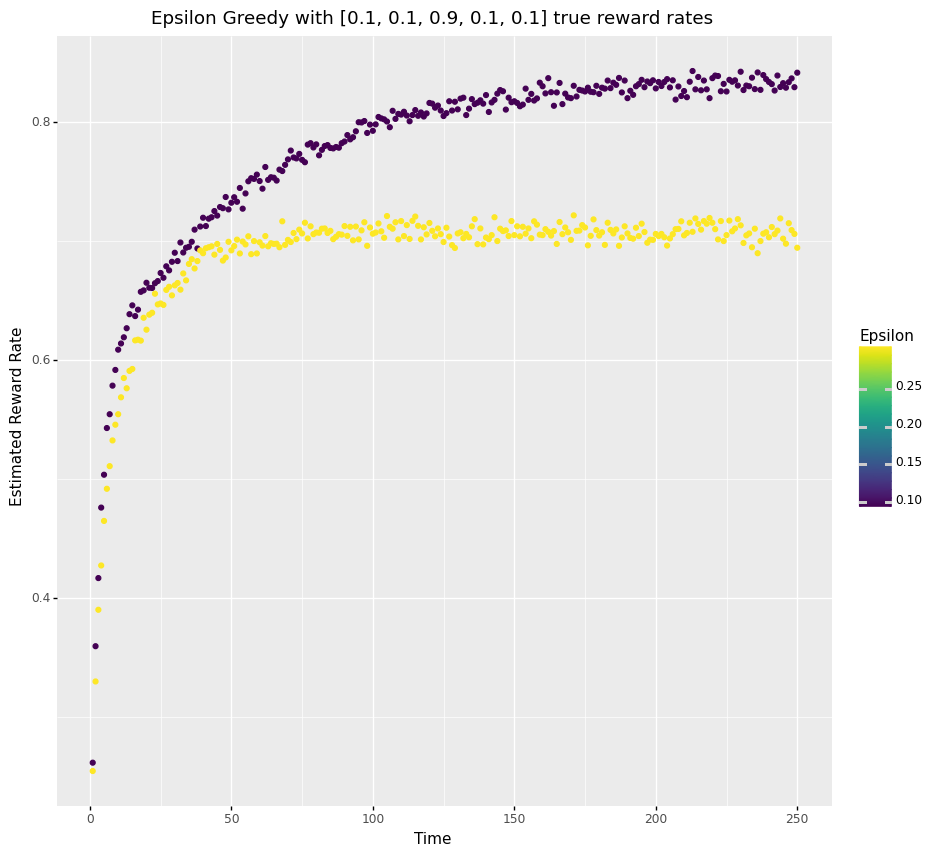

<ggplot: (332633607)>

In [32]:
results = pd.read_csv(f'Epsilon_greedy_with_multiple_epsilons_{fileSuffix}.csv',  names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['Epsilon', 'T']).agg({'Reward': ['mean']})
results.columns = ['Avg Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Avg Reward', group = 'Epsilon', color = 'Epsilon'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Epsilon Greedy with {means} true reward rates")

)


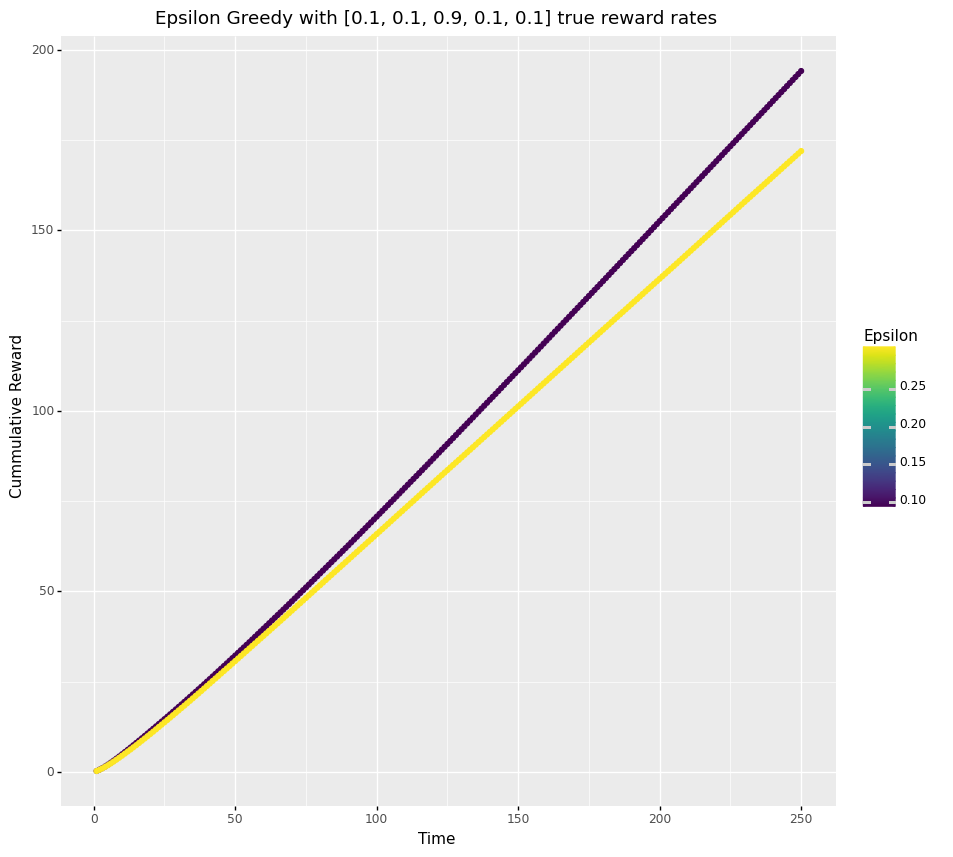

<ggplot: (284419130)>

In [6]:
results = pd.read_csv(f'Epsilon_greedy_with_multiple_epsilons_{fileSuffix}.csv',  names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['Epsilon', 'T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward', group = 'Epsilon', color = 'Epsilon'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Cummulative Reward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Epsilon Greedy with {means} true reward rates")

)


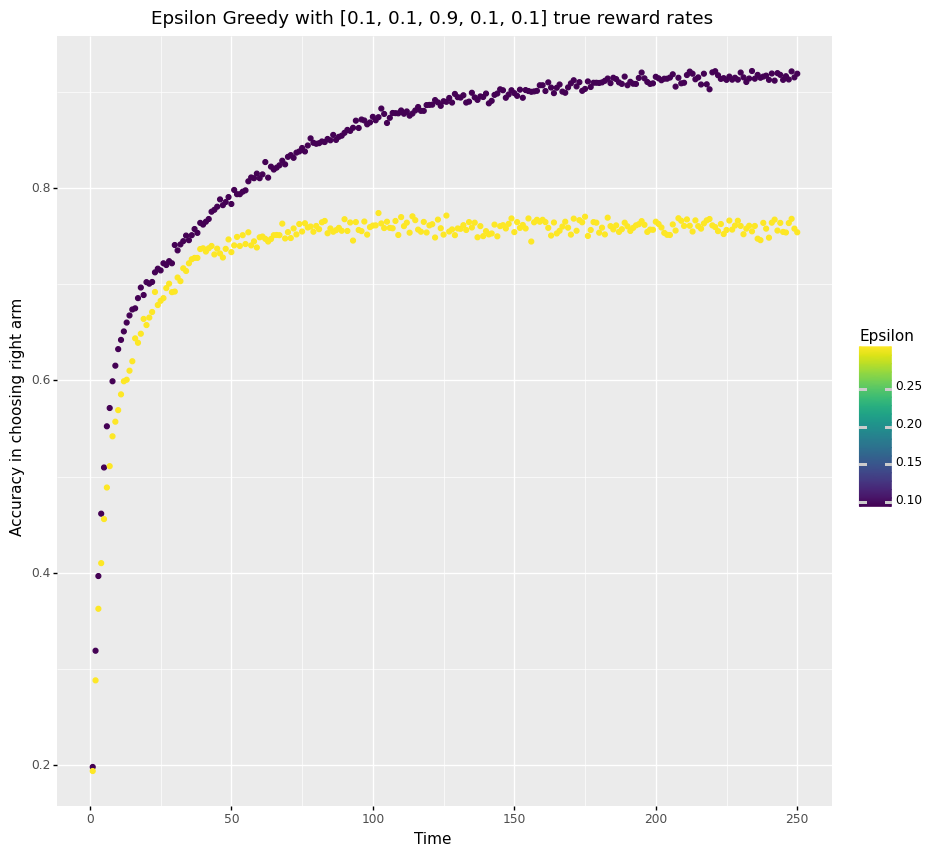

<ggplot: (332221681)>

In [7]:
results = pd.read_csv(f'Epsilon_greedy_with_multiple_epsilons_{fileSuffix}.csv',  names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['Epsilon', 'T']).agg({'is_correct_selected': ['mean']})
results.columns = ['Accuracy in choosing right arm']
results = results.reset_index()

(
    ggplot(results, aes(x = 'T', y = 'Accuracy in choosing right arm', group = 'Epsilon', color = 'Epsilon'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Epsilon Greedy with {means} true reward rates")

)


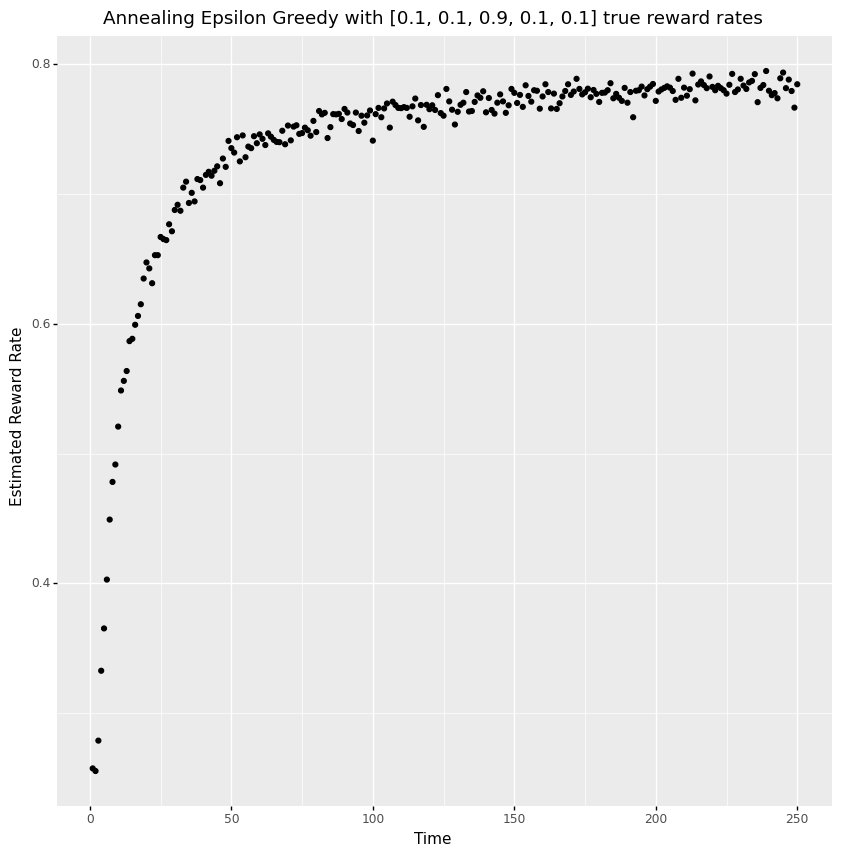

<ggplot: (332227612)>

In [8]:
results = pd.read_csv(f'annealing_epsilon_greedy_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'Reward': ['mean']})
results.columns = ['Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Reward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") +  
        theme(figure_size = (10, 10))+
        ggtitle(f"Annealing Epsilon Greedy with {means} true reward rates")

)



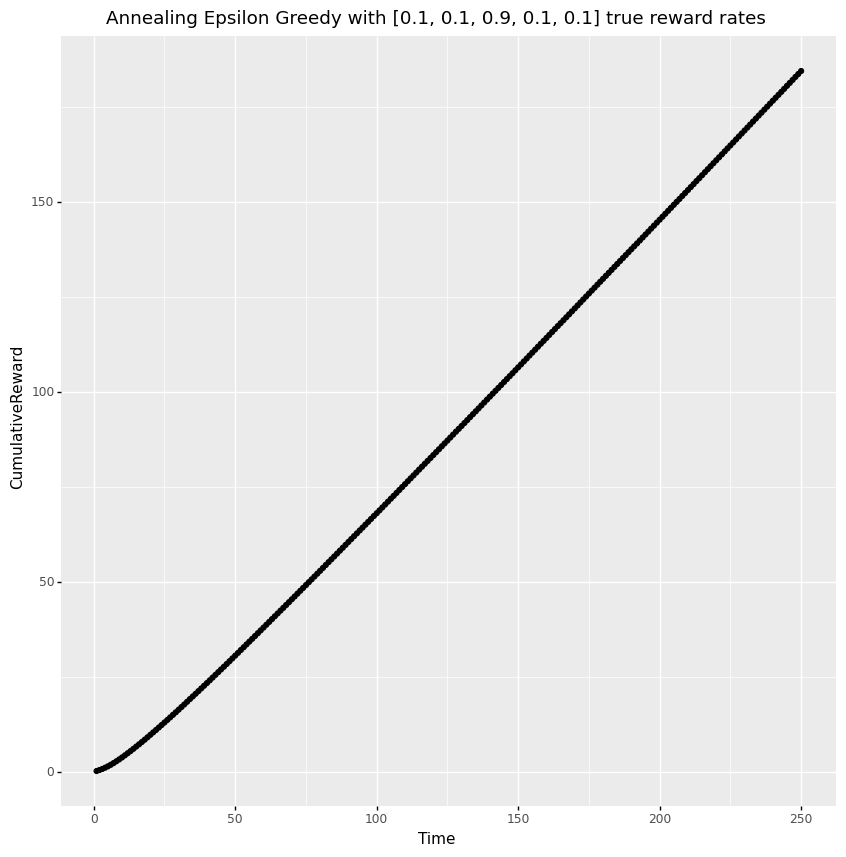

<ggplot: (332082164)>

In [9]:
results = pd.read_csv(f'annealing_epsilon_greedy_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("CumulativeReward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Annealing Epsilon Greedy with {means} true reward rates")

)



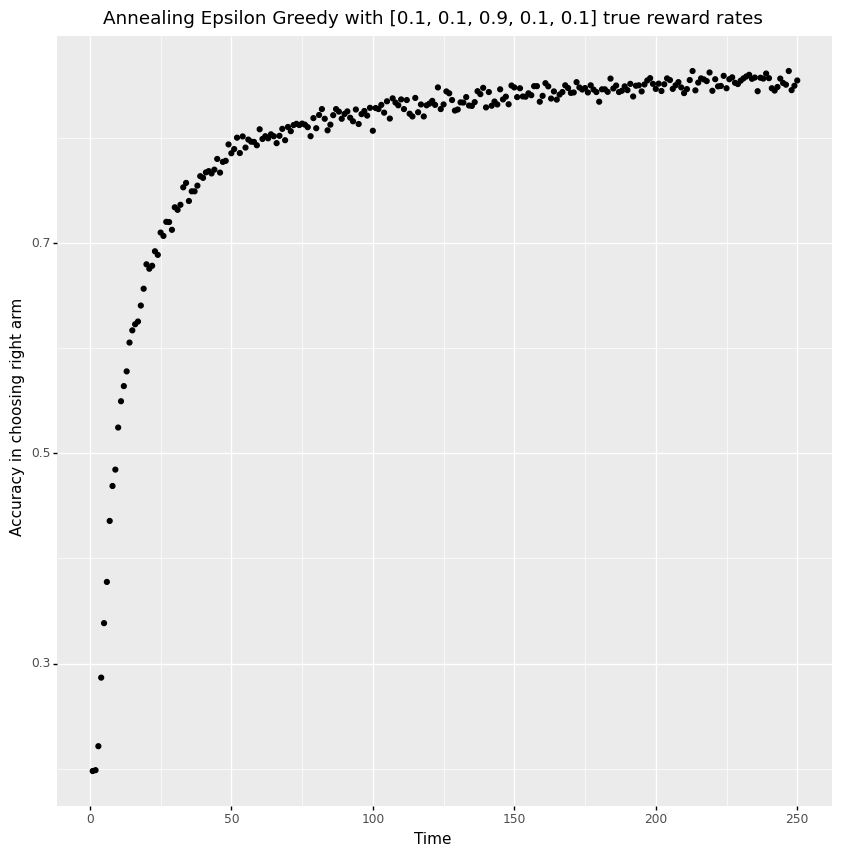

<ggplot: (332057597)>

In [10]:
results = pd.read_csv(f'annealing_epsilon_greedy_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['T']).agg({'is_correct_selected': ['mean']})
results.columns = ['is_correct_selected']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'is_correct_selected'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Annealing Epsilon Greedy with {means} true reward rates")

)



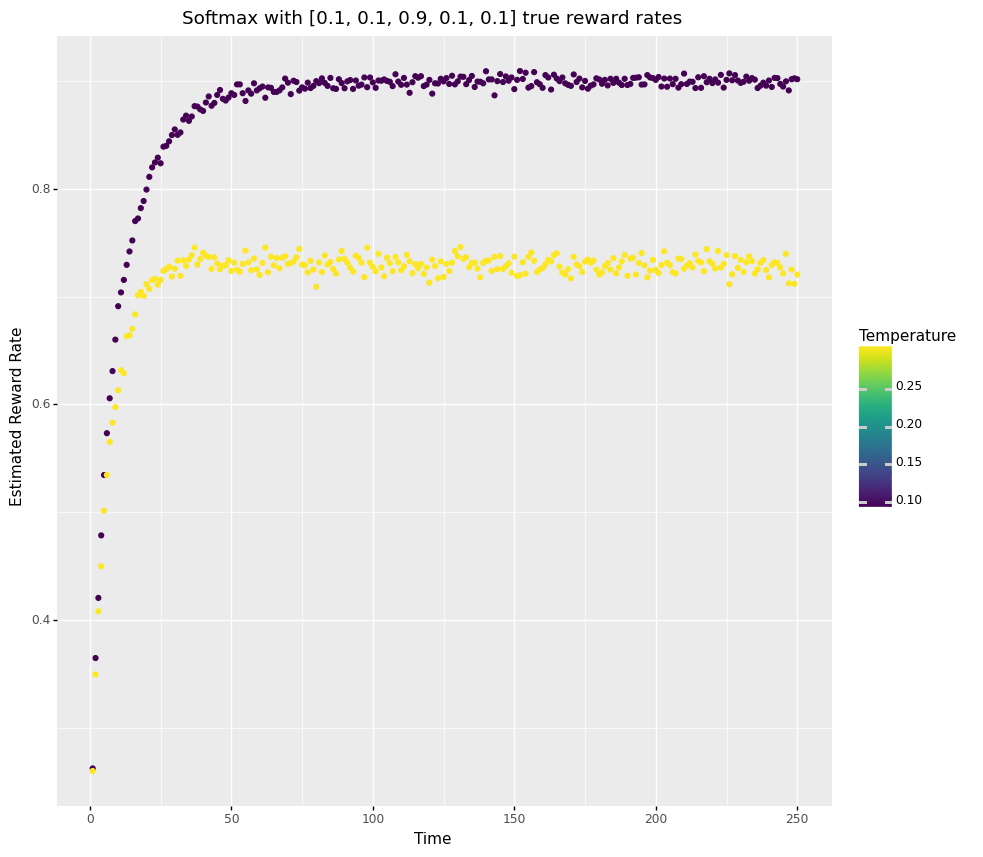

<ggplot: (337118862)>

In [11]:
results = pd.read_csv(f'standard_softmax_results_{fileSuffix}.csv',  names=["Temperature", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['Temperature', 'T']).agg({'Reward': ['mean']})
results.columns = ['Avg Reward']
results = results.reset_index()

(
    ggplot(results, aes(x = 'T', y = 'Avg Reward', group = 'Temperature', color = 'Temperature'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Softmax with {means} true reward rates")

)


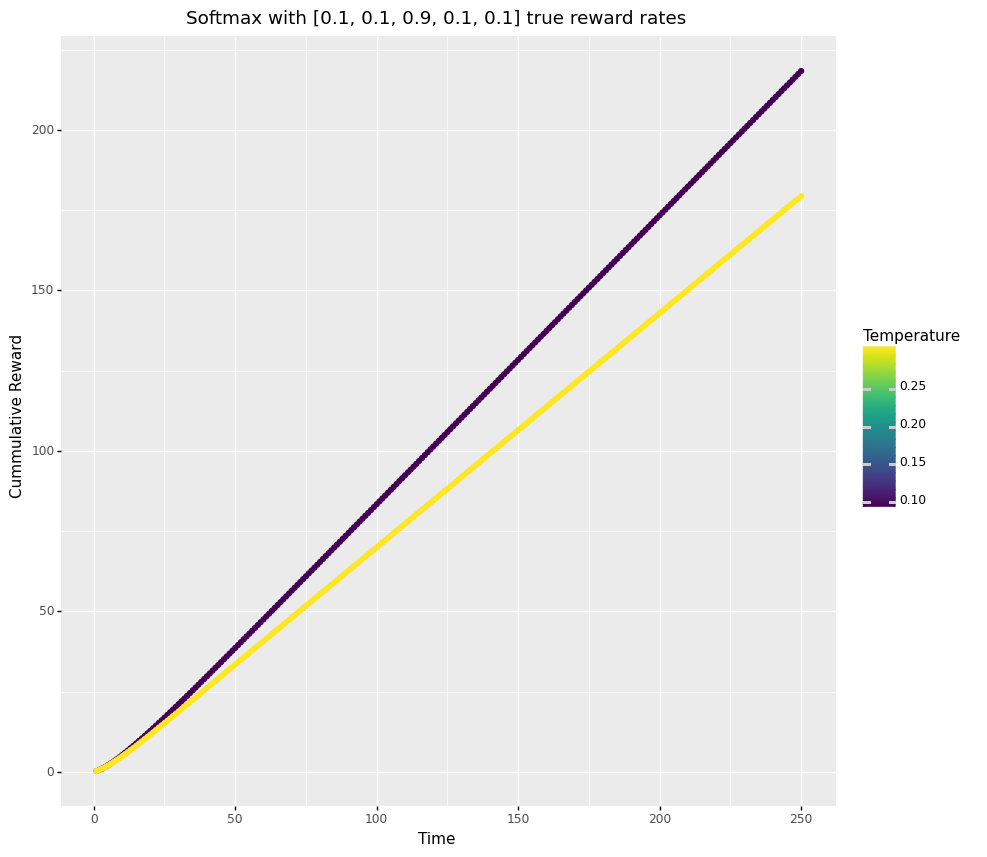

<ggplot: (332112270)>

In [12]:
results = pd.read_csv(f'standard_softmax_results_{fileSuffix}.csv',  names=["Temperature", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['Temperature', 'T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()

(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward', group = 'Temperature', color = 'Temperature'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Cummulative Reward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Softmax with {means} true reward rates")

)


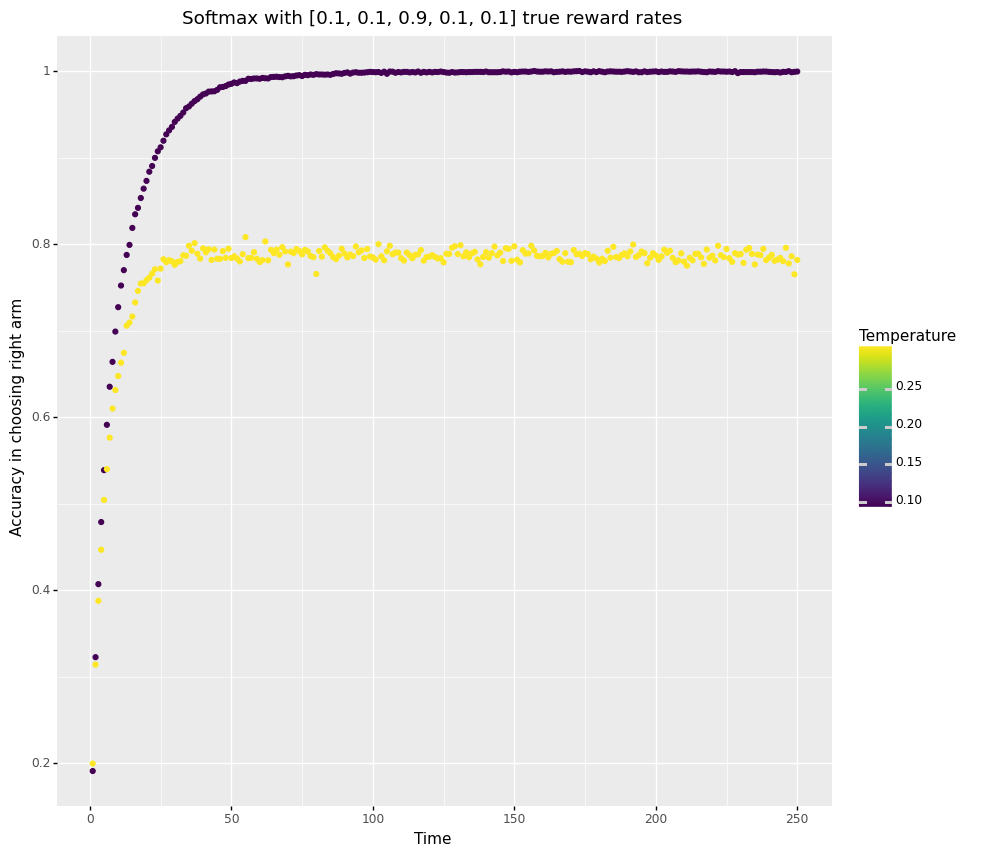

<ggplot: (334535566)>

In [13]:
results = pd.read_csv(f'standard_softmax_results_{fileSuffix}.csv',  names=["Temperature", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['Temperature', 'T']).agg({'is_correct_selected': ['mean']})
results.columns = ['Accuracy in choosing right arm']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Accuracy in choosing right arm', group = 'Temperature', color = 'Temperature'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Softmax with {means} true reward rates")

)

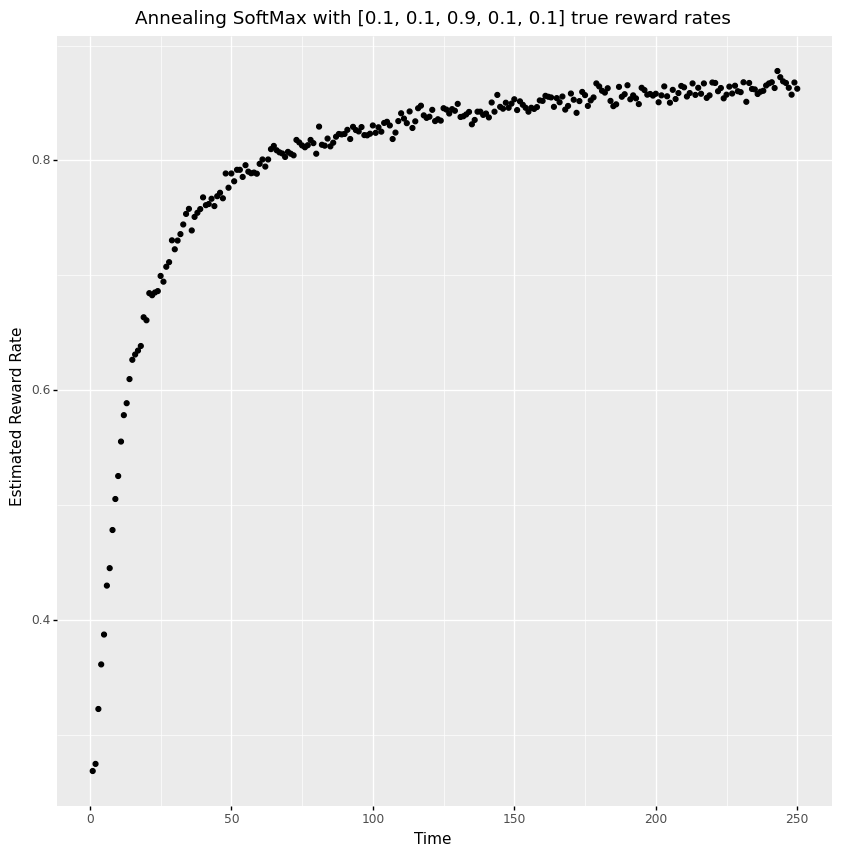

<ggplot: (332213869)>

In [14]:
results = pd.read_csv(f'annealing_softmax_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'Reward': ['mean']})
results.columns = ['Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Reward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") +  
        theme(figure_size = (10, 10))+
        ggtitle(f"Annealing SoftMax with {means} true reward rates")
)



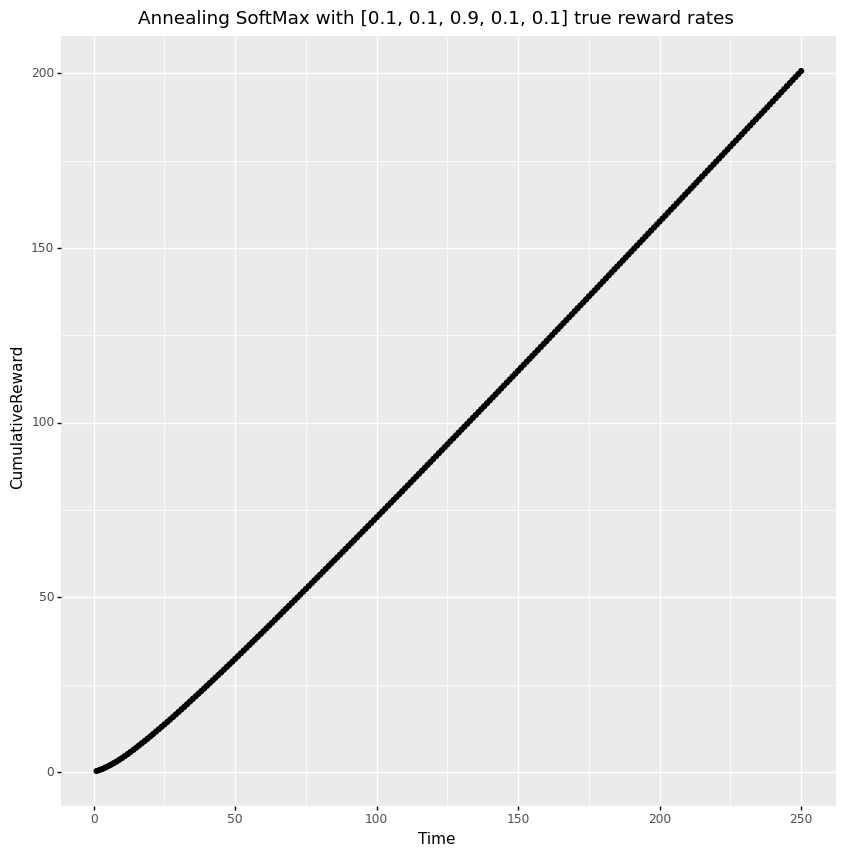

<ggplot: (332264108)>

In [15]:
results = pd.read_csv(f'annealing_softmax_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("CumulativeReward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Annealing SoftMax with {means} true reward rates")
)


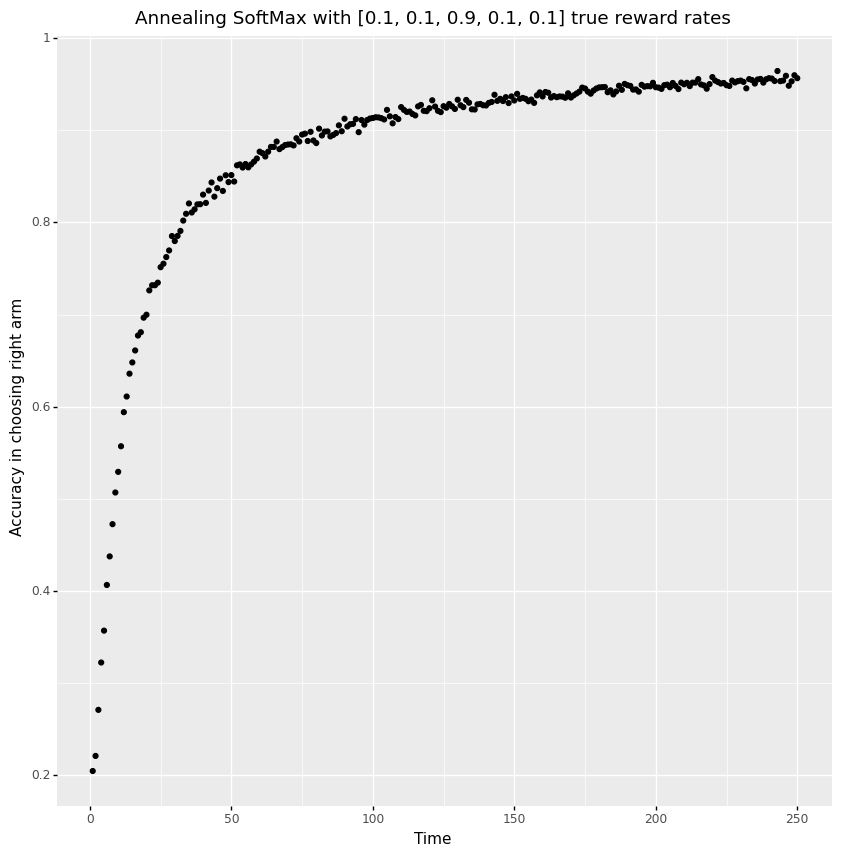

<ggplot: (332137226)>

In [16]:
results = pd.read_csv(f'annealing_softmax_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['T']).agg({'is_correct_selected': ['mean']})
results.columns = ['is_correct_selected']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'is_correct_selected'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Annealing SoftMax with {means} true reward rates")
)



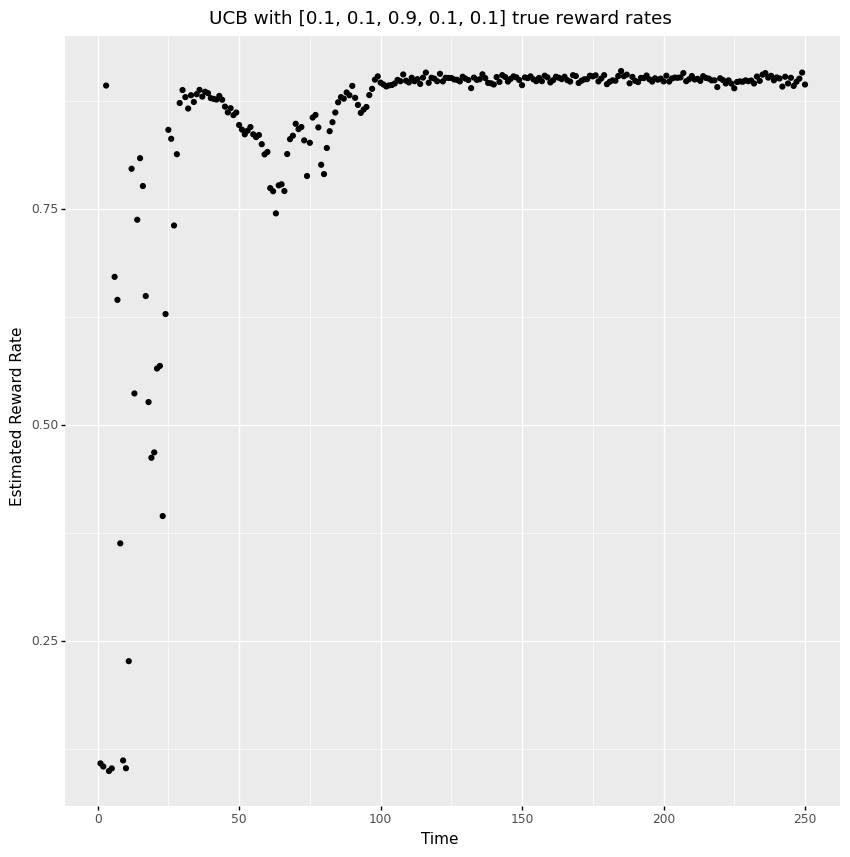

<ggplot: (332308664)>

In [17]:
results = pd.read_csv(f'UpperConfidenceBound_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'Reward': ['mean']})
results.columns = ['Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Reward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") +  
        theme(figure_size = (10, 10))+
        ggtitle(f"UCB with {means} true reward rates")
)



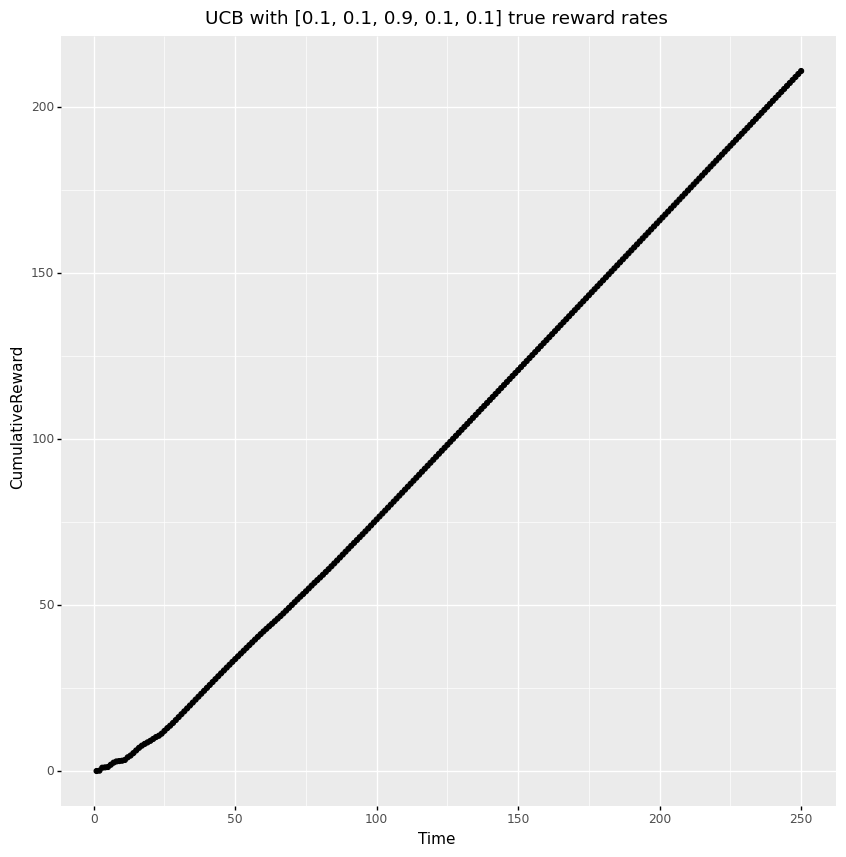

<ggplot: (332303397)>

In [18]:
results = pd.read_csv(f'UpperConfidenceBound_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("CumulativeReward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"UCB with {means} true reward rates")
)


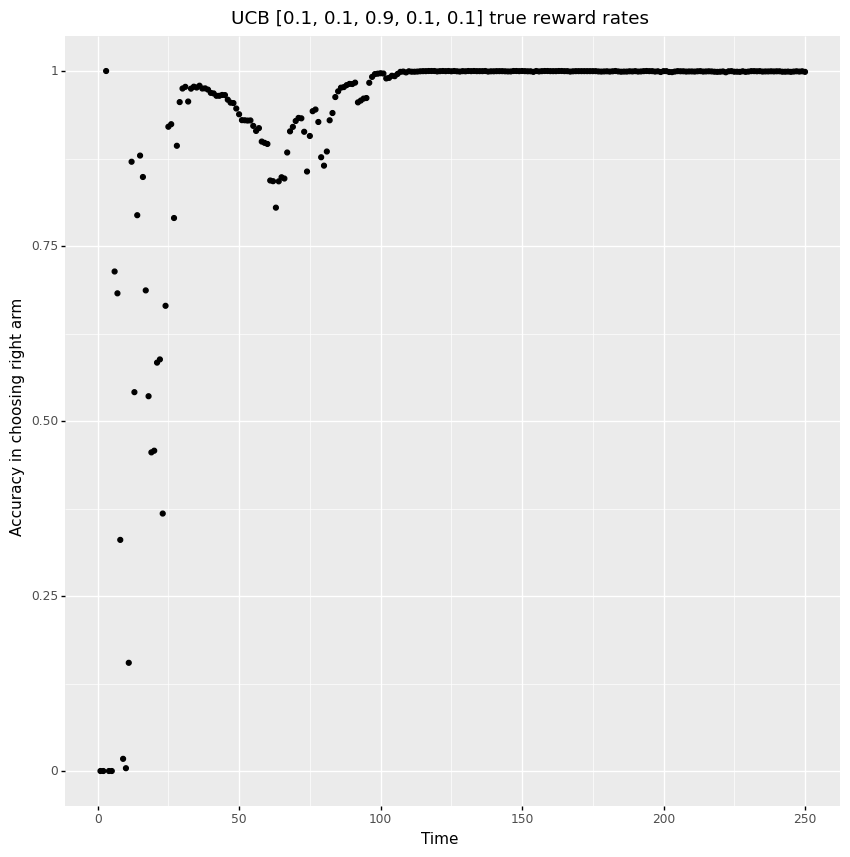

<ggplot: (332316462)>

In [19]:
results = pd.read_csv(f'UpperConfidenceBound_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['T']).agg({'is_correct_selected': ['mean']})
results.columns = ['is_correct_selected']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'is_correct_selected'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"UCB {means} true reward rates")
)

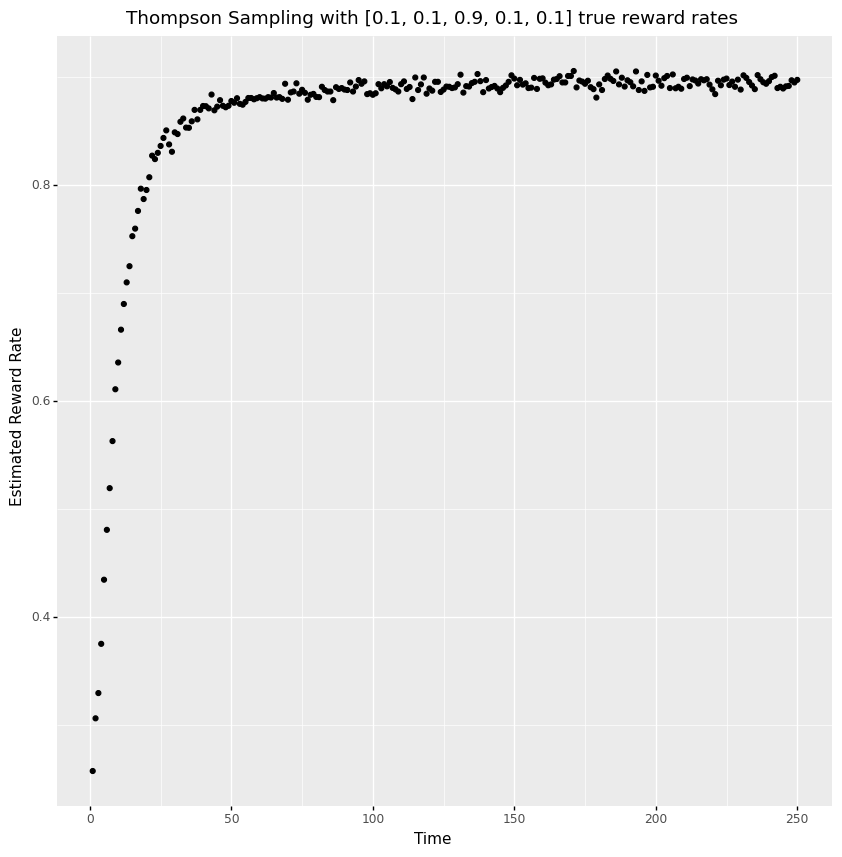

<ggplot: (332451518)>

In [20]:
results = pd.read_csv(f'ThompsonSampling_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'Reward': ['mean']})
results.columns = ['Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Reward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") +  
        theme(figure_size = (10, 10))+
        ggtitle(f"Thompson Sampling with {means} true reward rates")
)



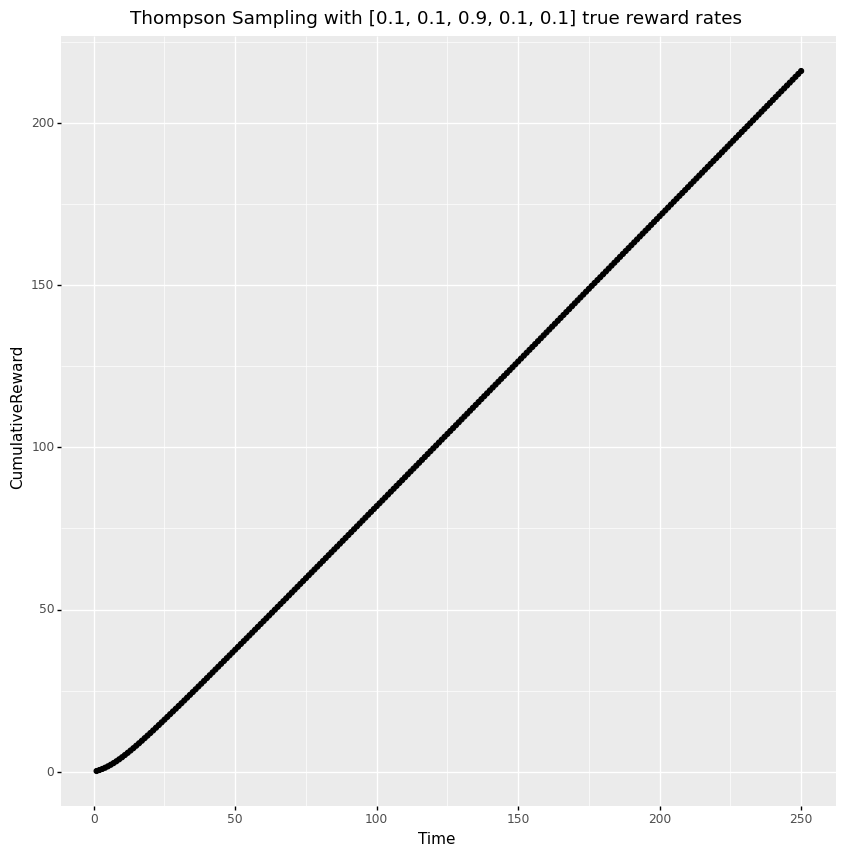

<ggplot: (332411618)>

In [21]:
results = pd.read_csv(f'ThompsonSampling_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results = results.groupby(['T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("CumulativeReward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Thompson Sampling with {means} true reward rates")
)

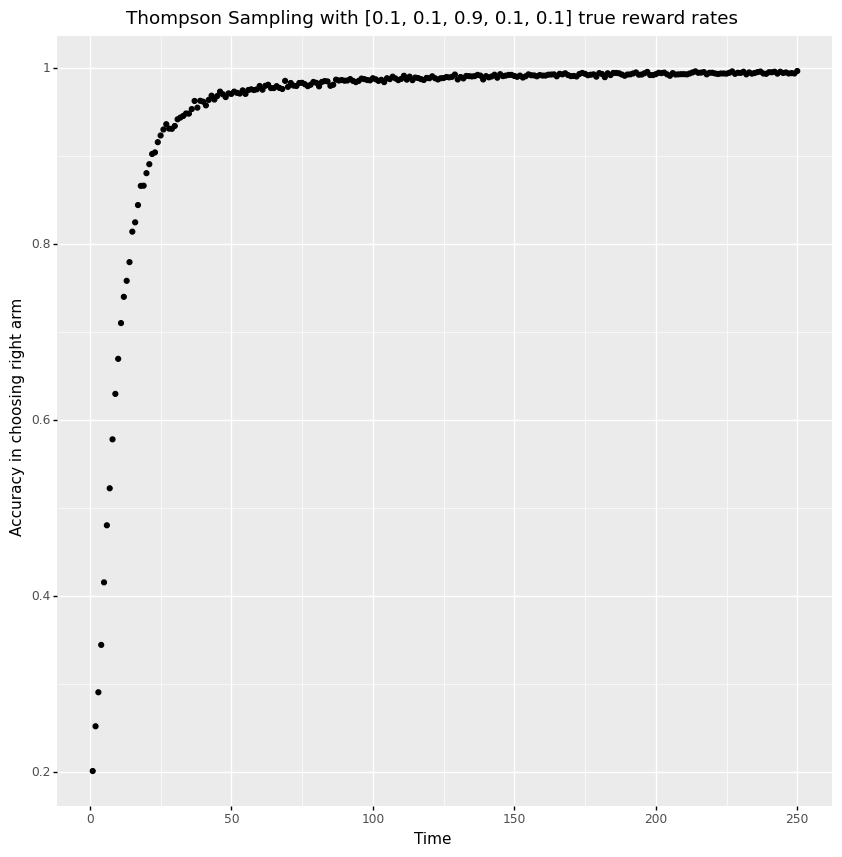

<ggplot: (332061971)>

In [22]:
results = pd.read_csv(f'ThompsonSampling_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['T']).agg({'is_correct_selected': ['mean']})
results.columns = ['is_correct_selected']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'is_correct_selected'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Thompson Sampling with {means} true reward rates")
)

In [23]:
# pd.read_csv(f'annealing_epsilon_greedy_results_{fileSuffix}.csv')

annealing_softmax = pd.read_csv(f'annealing_softmax_results_{fileSuffix}.csv',         names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
annealing_eg      = pd.read_csv(f'annealing_epsilon_greedy_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
ucb               = pd.read_csv(f'UpperConfidenceBound_{fileSuffix}.csv',              names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
ts                = pd.read_csv(f'ThompsonSampling_{fileSuffix}.csv',                  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])


annealing_softmax['algo'] = 'annealing_softmax'
annealing_eg['algo'] = 'annealing_eg'
ucb['algo'] = 'ucb'
ts['algo'] = 'Thompson_Sampling'

mabs = pd.concat([annealing_softmax, annealing_eg, ucb, ts])


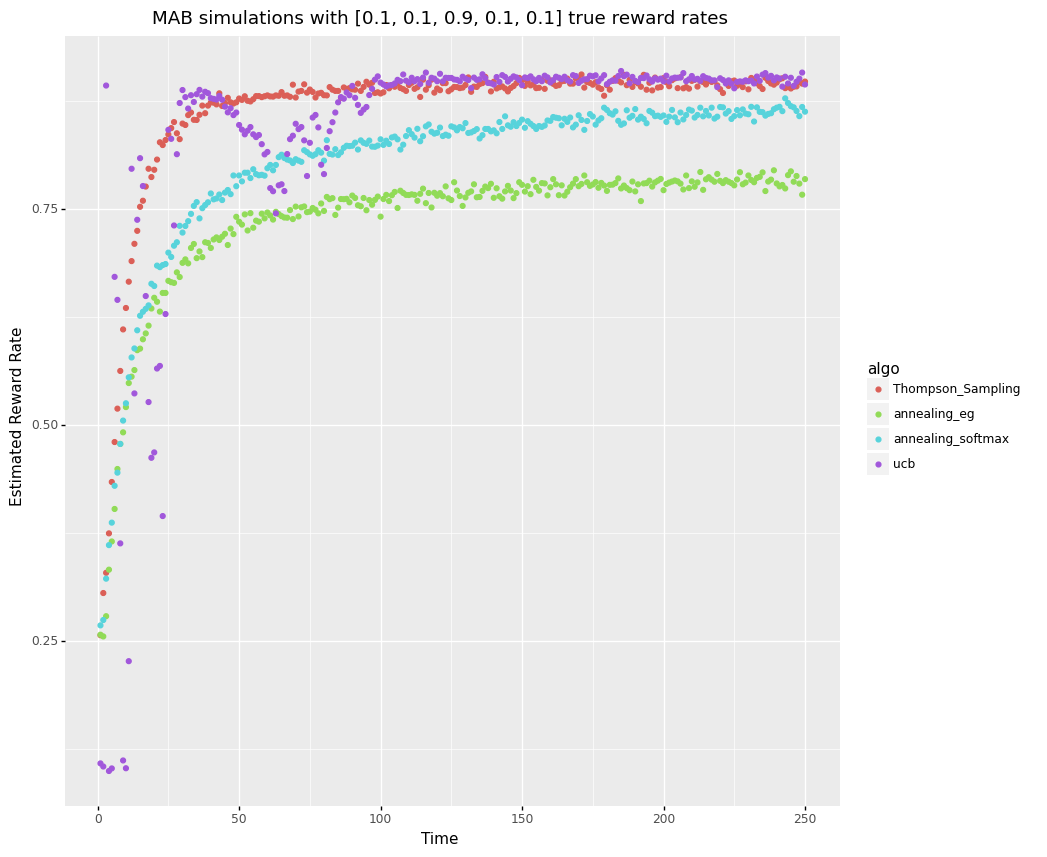

<ggplot: (332501255)>

In [24]:
results = mabs.groupby(['algo', 'T']).agg({'Reward': ['mean']})
results.columns = ['Avg Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Avg Reward', group = 'algo', color = 'algo'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"MAB simulations with {means} true reward rates")

)

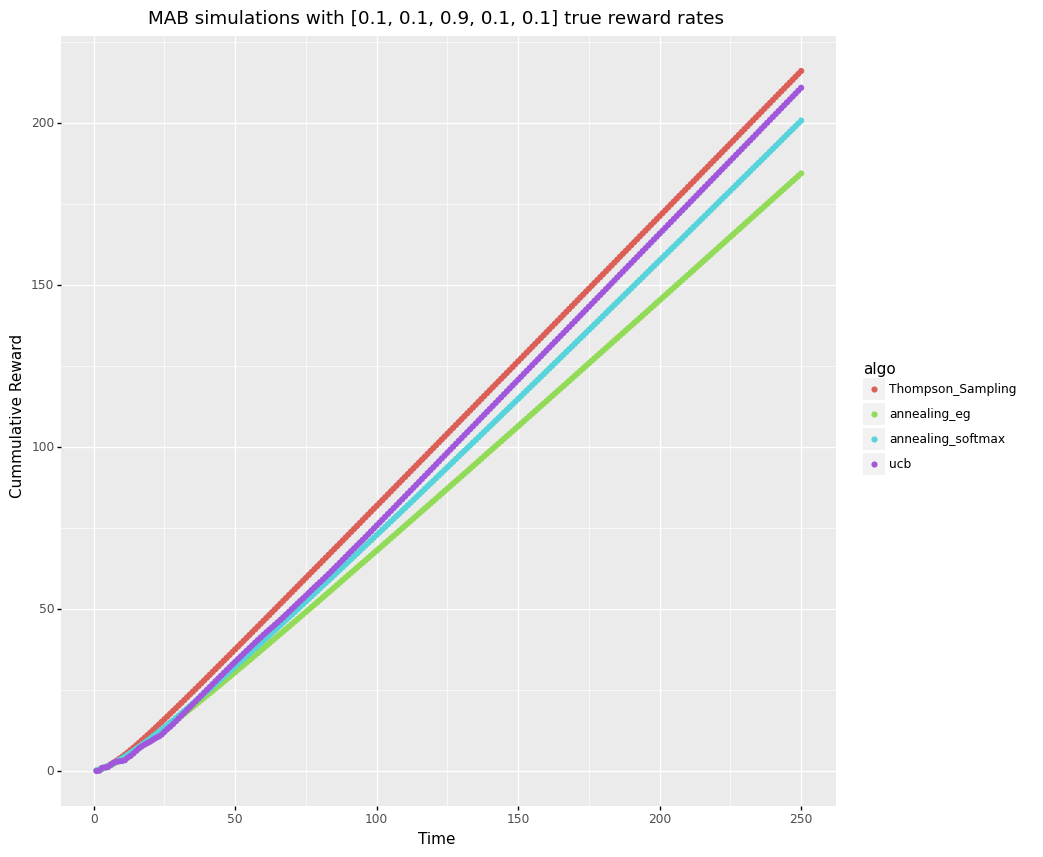

<ggplot: (332221931)>

In [25]:
results = mabs.groupby(['algo', 'T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward', group = 'algo', color = 'algo'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Cummulative Reward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"MAB simulations with {means} true reward rates")

)


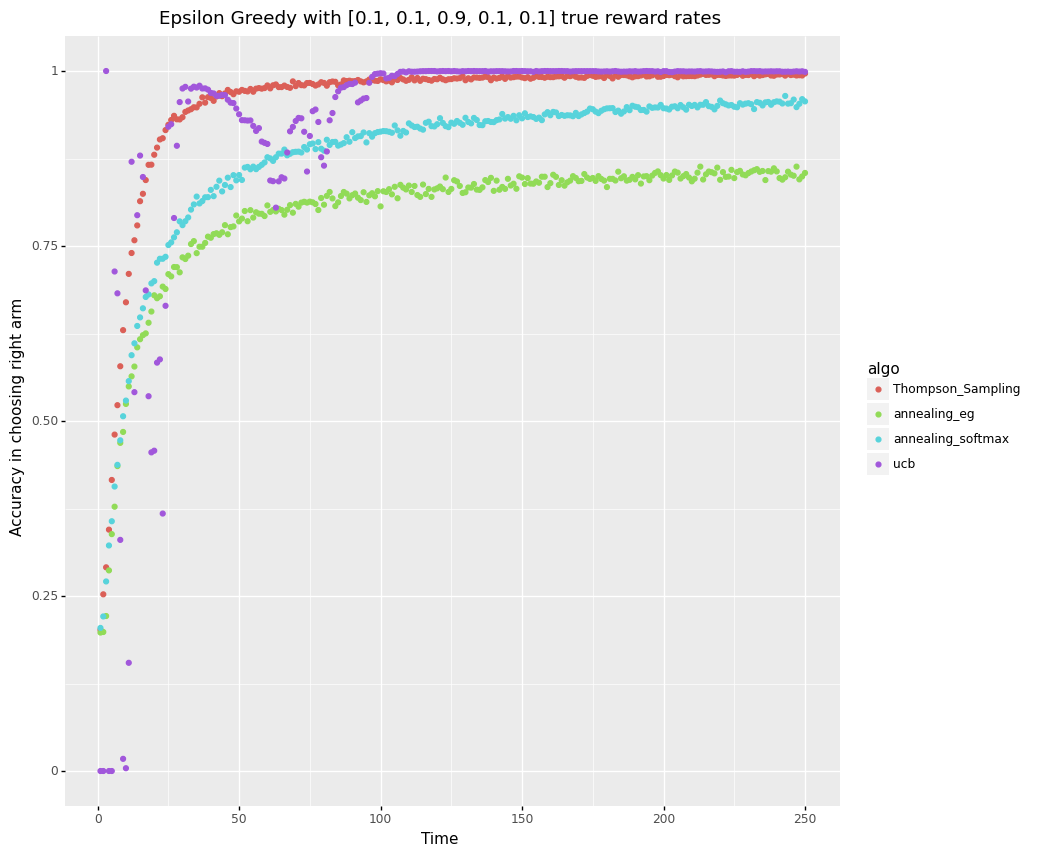

<ggplot: (332386064)>

In [26]:
results = mabs
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['algo', 'T']).agg({'is_correct_selected': ['mean']})
results.columns = ['Accuracy in choosing right arm']
results = results.reset_index()

(
    ggplot(results, aes(x = 'T', y = 'Accuracy in choosing right arm', group = 'algo', color = 'algo'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Epsilon Greedy with {means} true reward rates")

)


In [27]:
epsilon_greedy = pd.read_csv(f'Epsilon_greedy_with_multiple_epsilons_{fileSuffix}.csv',  names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
epsilon_greedy['Epsilon'] = epsilon_greedy['Epsilon'].astype('str')
epsilon_greedy['algo'] = 'epsilon_greedy-' + epsilon_greedy['Epsilon']
epsilon_greedy = epsilon_greedy.drop(columns=['Epsilon'])


In [28]:
annealing_softmax = pd.read_csv(f'annealing_softmax_results_{fileSuffix}.csv',         names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
annealing_eg      = pd.read_csv(f'annealing_epsilon_greedy_results_{fileSuffix}.csv',  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
ucb               = pd.read_csv(f'UpperConfidenceBound_{fileSuffix}.csv',              names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
ts                = pd.read_csv(f'ThompsonSampling_{fileSuffix}.csv',                  names=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])

epsilon_greedy    = pd.read_csv(f'Epsilon_greedy_with_multiple_epsilons_{fileSuffix}.csv',  names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
softmax           = pd.read_csv(f'standard_softmax_results_{fileSuffix}.csv',               names=["Temperature", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])


annealing_softmax['algo'] = 'annealing_softmax'
annealing_eg['algo'] = 'annealing_eg'
ucb['algo'] = 'ucb'
ts['algo'] = 'Thmpson_Sampling'

epsilon_greedy['Epsilon'] = epsilon_greedy['Epsilon'].astype('str')
epsilon_greedy['algo'] = 'epsilongreedy-ep: ' + epsilon_greedy['Epsilon']
epsilon_greedy = epsilon_greedy.drop(columns=['Epsilon'])

softmax['Temperature'] = softmax['Temperature'].astype('str')
softmax['algo'] = 'softmax-temp: ' + softmax['Temperature']
softmax = softmax.drop(columns=['Temperature'])


mabs = pd.concat([annealing_softmax, annealing_eg, ucb, ts, epsilon_greedy, softmax])


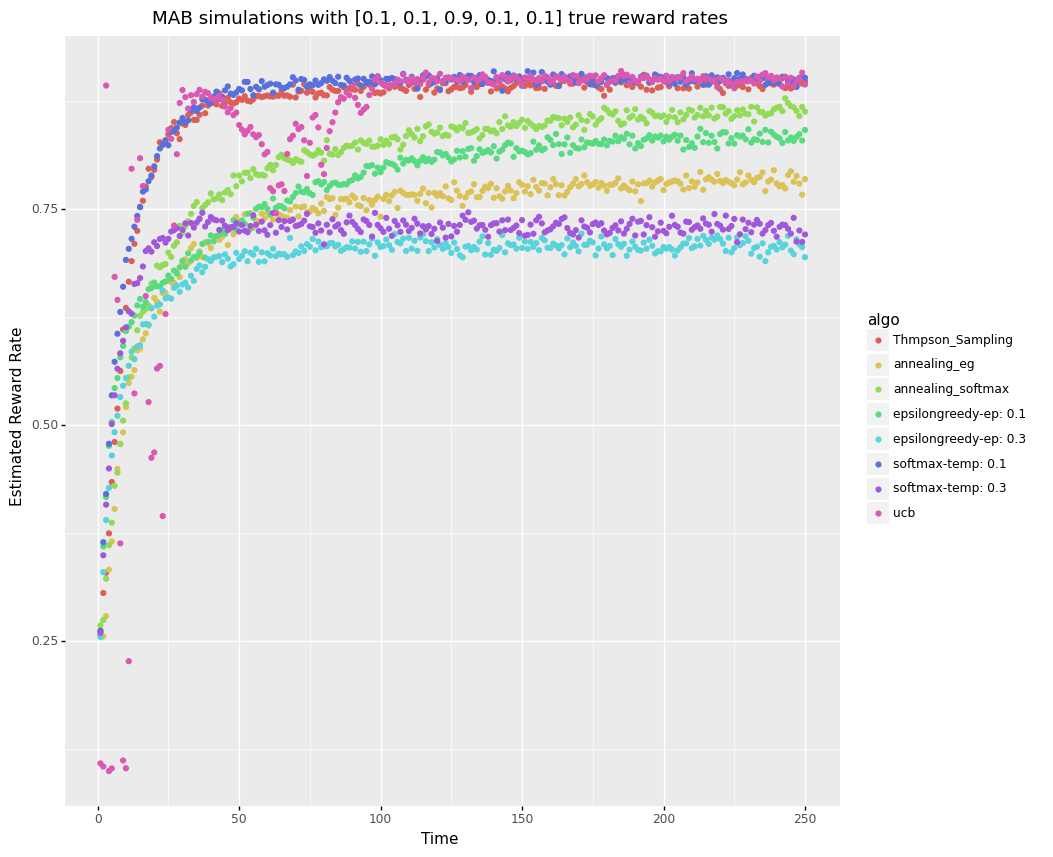

<ggplot: (332579539)>

In [29]:
results = mabs.groupby(['algo', 'T']).agg({'Reward': ['mean']})
results.columns = ['Avg Reward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'Avg Reward', group = 'algo', color = 'algo'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Estimated Reward Rate") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"MAB simulations with {means} true reward rates")

)

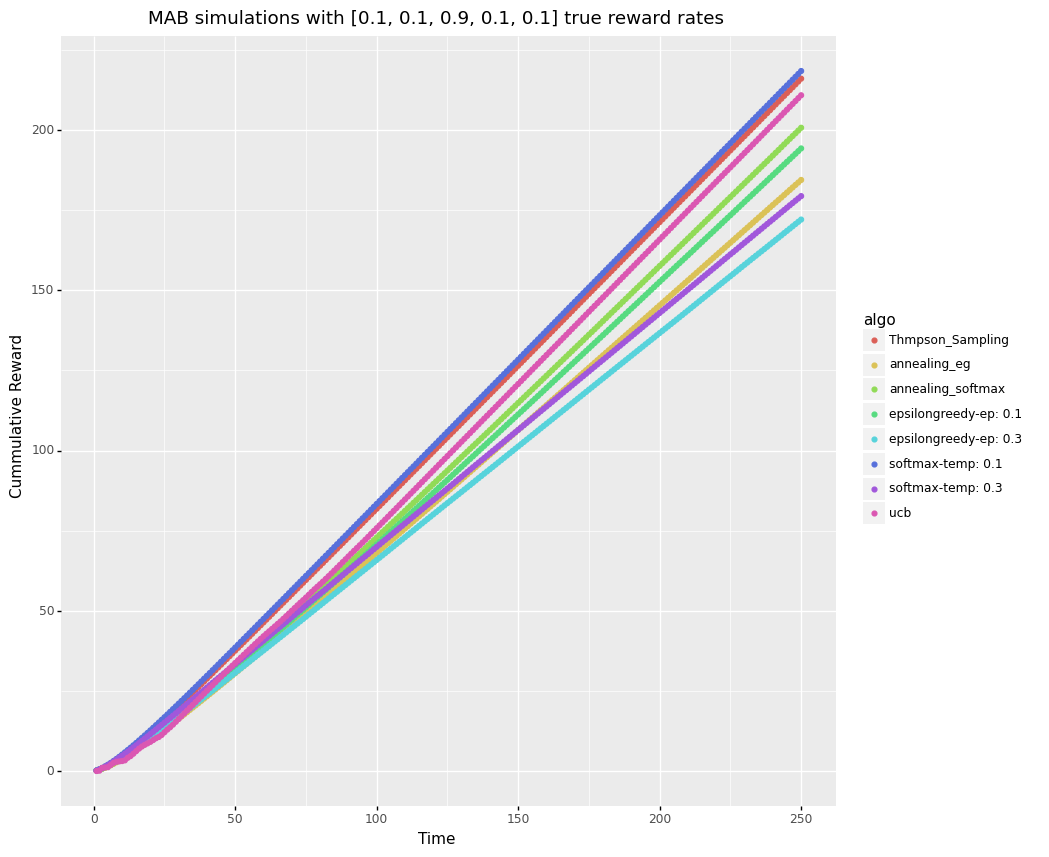

<ggplot: (332157642)>

In [30]:
results = mabs.groupby(['algo', 'T']).agg({'CumulativeReward': ['mean']})
results.columns = ['CumulativeReward']
results = results.reset_index()
(
    ggplot(results, aes(x = 'T', y = 'CumulativeReward', group = 'algo', color = 'algo'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Cummulative Reward") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"MAB simulations with {means} true reward rates")
)

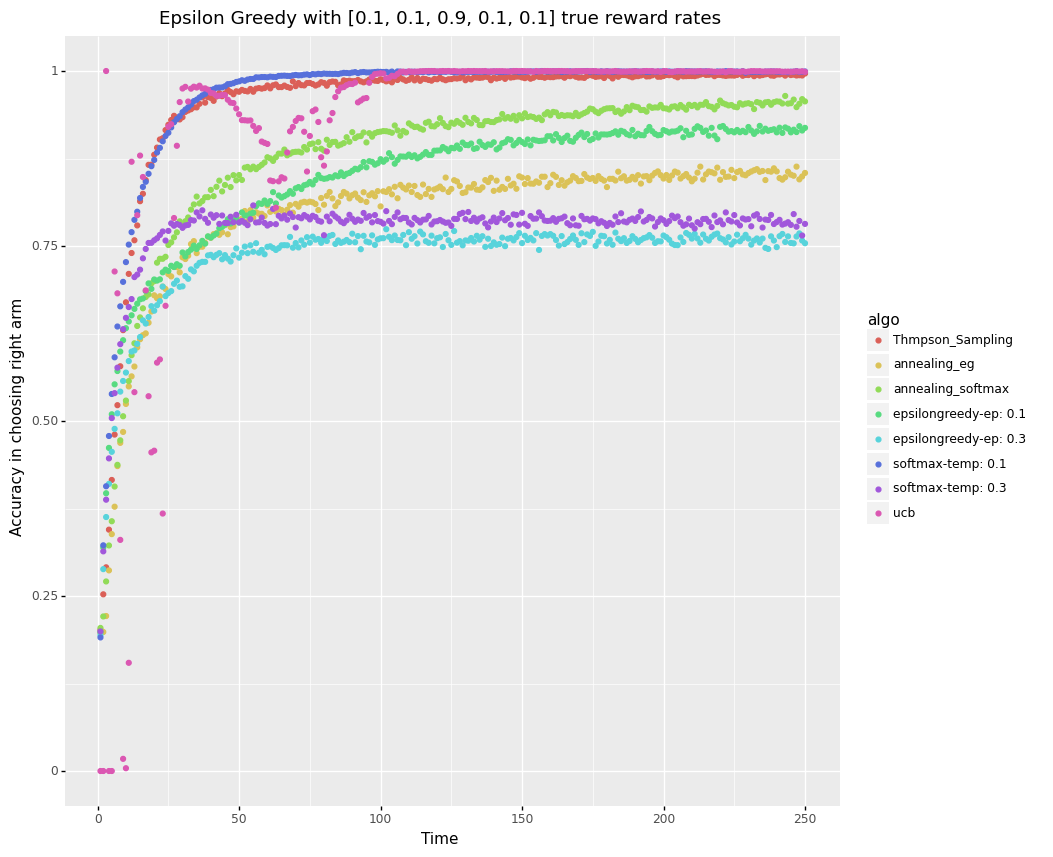

<ggplot: (332623195)>

In [31]:
results = mabs
results['is_correct_selected'] = results['ChosenArm'] == best_arm_idx
results = results.groupby(['algo', 'T']).agg({'is_correct_selected': ['mean']})
results.columns = ['Accuracy in choosing right arm']
results = results.reset_index()

(
    ggplot(results, aes(x = 'T', y = 'Accuracy in choosing right arm', group = 'algo', color = 'algo'))  + 
        geom_point() + 
        xlab("Time") +
        ylab("Accuracy in choosing right arm") + 
        theme(figure_size = (10, 10))+
        ggtitle(f"Epsilon Greedy with {means} true reward rates")

)